# Structured data analysis example

This example will use subsets of a dataset of reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present. Source – Chicago data portal https://data.cityofchicago.org/.
Only a portion of the data entries in the dataset will be used to illustrate how to work with structured data using Pandas.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO

## Read the data

We will get the data from a git repository (inside SU) and bring it into the notebook. You can use most of this process to get data from other datasets using the URL that points to the dataset. Although some adaptations might be needed depending on the format of the dataset (.csv, .xls, etc)

In [2]:
#Defining the url from where we will get the dataset
urlsmallds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Crimes_small.csv"

#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
#crimes = pd.read_csv(url)    # won't work because of security (SSL) issue

csvdata=requests.get(urlsmallds,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
crimes_small=pd.read_csv(StringIO(csvdata))  #getting the data into a pandas dataframe

Let's see the data from the CSV file looks like…

In [4]:
crimes_small.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
crimes_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9 non-null      int64  
 1   Case Number           9 non-null      object 
 2   Date                  9 non-null      object 
 3   Block                 9 non-null      object 
 4   IUCR                  9 non-null      int64  
 5   Primary Type          9 non-null      object 
 6   Description           9 non-null      object 
 7   Location Description  9 non-null      object 
 8   Arrest                9 non-null      bool   
 9   Domestic              9 non-null      bool   
 10  Beat                  9 non-null      int64  
 11  District              9 non-null      int64  
 12  Ward                  9 non-null      int64  
 13  Community Area        9 non-null      int64  
 14  FBI Code              9 non-null      object 
 15  X Coordinate          8 non

The "Date" column does not have the correct data type to make good use of it as a date column. We need to parse that column so that it gets correctly formatted. (See this link for more tricks with dates: https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e)

In [6]:
crimes_small=pd.read_csv(StringIO(csvdata),parse_dates=[2])  #getting the data into a pandas dataframe with the correct format for dates

In [7]:
crimes_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    9 non-null      int64         
 1   Case Number           9 non-null      object        
 2   Date                  9 non-null      datetime64[ns]
 3   Block                 9 non-null      object        
 4   IUCR                  9 non-null      int64         
 5   Primary Type          9 non-null      object        
 6   Description           9 non-null      object        
 7   Location Description  9 non-null      object        
 8   Arrest                9 non-null      bool          
 9   Domestic              9 non-null      bool          
 10  Beat                  9 non-null      int64         
 11  District              9 non-null      int64         
 12  Ward                  9 non-null      int64         
 13  Community Area        9 

Let's index the dataset by date. It will make it easier to work with.

In [8]:
crimes_small.set_index("Date",inplace=True)

In [9]:
crimes_small.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2015-09-04 11:30:00,10224739,HY411615,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-05 12:45:00,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
2015-09-05 13:00:00,10224741,HY411610,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [10]:
crimes_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2015-09-05 13:30:00 to 2015-09-05 11:30:00
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9 non-null      int64  
 1   Case Number           9 non-null      object 
 2   Block                 9 non-null      object 
 3   IUCR                  9 non-null      int64  
 4   Primary Type          9 non-null      object 
 5   Description           9 non-null      object 
 6   Location Description  9 non-null      object 
 7   Arrest                9 non-null      bool   
 8   Domestic              9 non-null      bool   
 9   Beat                  9 non-null      int64  
 10  District              9 non-null      int64  
 11  Ward                  9 non-null      int64  
 12  Community Area        9 non-null      int64  
 13  FBI Code              9 non-null      object 
 14  X Coordinate          8 non-null      f

Now, let's get the larger dataset into our notebook

In [11]:
urlmediumds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Crimes_medium_100k.csv"

csvdata100k=requests.get(urlmediumds,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


We can get the pandas dataframe correctly structured in one command (thanks to the work on the small version of the dataset)

In [12]:
crimes=pd.read_csv(StringIO(csvdata100k),parse_dates=[2], index_col=[2])

In [13]:
crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2015-09-04 11:30:00,10224739,HY411615,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-05 12:45:00,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
2015-09-05 13:00:00,10224741,HY411610,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [14]:
crimes.index

DatetimeIndex(['2015-09-05 13:30:00', '2015-09-04 11:30:00',
               '2018-09-01 00:01:00', '2015-09-05 12:45:00',
               '2015-09-05 13:00:00', '2015-09-05 10:55:00',
               '2015-09-04 18:00:00', '2015-09-05 13:00:00',
               '2015-09-05 11:30:00', '2016-05-01 00:25:00',
               ...
               '2015-08-29 03:18:00', '2015-08-28 10:55:00',
               '2015-08-29 05:00:00', '2015-08-29 03:10:00',
               '2015-08-29 04:04:00', '2015-08-29 04:15:00',
               '2015-08-29 04:30:00', '2009-01-01 00:00:00',
               '2015-08-29 03:45:00', '2015-05-27 16:21:00'],
              dtype='datetime64[ns]', name='Date', length=100000, freq=None)

In [15]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2015-09-05 13:30:00 to 2015-05-27 16:21:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  object 
 2   Block                 100000 non-null  object 
 3   IUCR                  100000 non-null  object 
 4   Primary Type          100000 non-null  object 
 5   Description           100000 non-null  object 
 6   Location Description  99729 non-null   object 
 7   Arrest                100000 non-null  bool   
 8   Domestic              100000 non-null  bool   
 9   Beat                  100000 non-null  int64  
 10  District              100000 non-null  int64  
 11  Ward                  99995 non-null   float64
 12  Community Area        99995 non-null   float64
 13  FBI Code              100000 non-null  object 
 14  X Coordinate      

Resampling is a very powerful feature of Pandas. You can leverage it if you have a datetime type index in your dataset. Let's resample the dataset by day. 
(For more information on re-sampling, look at https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4 )

In [19]:
daily_crimes = crimes['Primary Type'].resample('D').count()  #resample, count crimes per day
daily_crimes.sort_index(inplace=True)

In [20]:
daily_crimes.tail()

Date
2020-12-07     2
2020-12-08     1
2020-12-09     0
2020-12-10     6
2020-12-11    98
Freq: D, Name: Primary Type, dtype: int64

<AxesSubplot:xlabel='Date'>

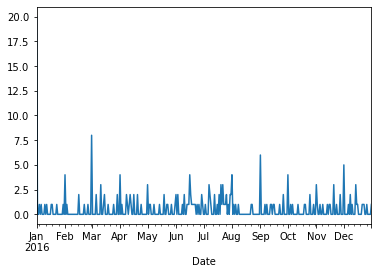

In [21]:
daily_crimes2016 = daily_crimes['2016']
daily_crimes2016.plot()

In [34]:
daily_crimes2016.tail()

Date
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    1
Freq: D, Name: Primary Type, dtype: int64

And an awesome feature – slicing is datetime-aware

In [22]:
daily_crimes2016['2016-03-01':].head()

Date
2016-03-01    8
2016-03-02    0
2016-03-03    0
2016-03-04    0
2016-03-05    0
Freq: D, Name: Primary Type, dtype: int64

### Boolean indexing

Filter based on boolean expressions.

In [23]:
daily_crimes2016 > 3

Date
2016-01-01     True
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
              ...  
2016-12-27    False
2016-12-28    False
2016-12-29    False
2016-12-30    False
2016-12-31    False
Freq: D, Name: Primary Type, Length: 366, dtype: bool

Any expression that returns boolean values can also be used to index values where the boolean expression yields true.

In [24]:
daily_crimes2016[daily_crimes2016 > 3].count()

9

You can also combine expressions using boolean operators `&`, `|`, `!`

In [25]:
daily_crimes2016[(daily_crimes2016 > 1) & (daily_crimes2016 < 4)].count()

32

## Reshaping

The input data format is often not the most useful for actually processing and visualising the information we're most interested in. Pandas' offers many useful methods for reshaping the data:

- `pivot_table` – select exactly the rows/columns you want
- `stack` / `unstack` – append to the index, adding more levels of a hierarchical MultiIndex
- `groupby` – similar to the SQL `Group By` command
- `resample` – like `groupby`, but for creating groups from time intervals (hours, days, weeks, etc.)

There are lots of operations you can express using these commands – see more documentation on them [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html).

In [26]:
# Adding/appending another index to the crimes_small dataset. It now has two indexes
crimes_small_mi = crimes_small.set_index(['Primary Type'], append=True) 
crimes_small_mi

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,Primary Type,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,BATTERY,10224738,HY411648,043XX S WOOD ST,486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2015-09-04 11:30:00,THEFT,10224739,HY411615,008XX N CENTRAL AVE,870,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2018-09-01 00:01:00,THEFT,11646166,JC213529,082XX S INGLESIDE AVE,810,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-05 12:45:00,NARCOTICS,10224740,HY411595,035XX W BARRY AVE,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
2015-09-05 13:00:00,ASSAULT,10224741,HY411610,0000X N LARAMIE AVE,560,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
2015-09-05 10:55:00,BURGLARY,10224742,HY411435,082XX S LOOMIS BLVD,610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6,21,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
2015-09-04 18:00:00,BURGLARY,10224743,HY411629,021XX W CHURCHILL ST,620,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,1434,14,32,24,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"
2015-09-05 13:00:00,THEFT,10224744,HY411605,025XX W CERMAK RD,860,RETAIL THEFT,GROCERY FOOD STORE,True,False,1034,10,25,31,06,1159734.0,1889313.0,2015,09/17/2015 11:37:18 AM,41.851989,-87.689219,"(41.851988885, -87.689219118)"
2015-09-05 11:30:00,ROBBERY,10224745,HY411654,031XX W WASHINGTON BLVD,320,STRONGARM - NO WEAPON,STREET,False,True,1222,12,27,27,03,1155536.0,1900515.0,2015,02/10/2018 03:50:01 PM,41.882814,-87.704326,"(41.88281374, -87.704325717)"


In [27]:
crimes_small_mi.ID.unstack(level=1).resample('h').count()#.plot()

Primary Type,ASSAULT,BATTERY,BURGLARY,NARCOTICS,ROBBERY,THEFT
Date,,,,,,
2015-09-04 11:00:00,0,0,0,0,0,1
2015-09-04 12:00:00,0,0,0,0,0,0
2015-09-04 13:00:00,0,0,0,0,0,0
2015-09-04 14:00:00,0,0,0,0,0,0
2015-09-04 15:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2018-08-31 20:00:00,0,0,0,0,0,0
2018-08-31 21:00:00,0,0,0,0,0,0
2018-08-31 22:00:00,0,0,0,0,0,0


Now let's do this for the big dataset

In [28]:
crimes_mi = crimes.set_index(['Primary Type'], append=True)

But turns out the same command we used before would yield a `ValueError: Index contains duplicate entries, cannot reshape`

In [29]:
crimes_mi.ID.unstack(level=1).resample('h').count().plot()

ValueError: Index contains duplicate entries, cannot reshape

Opps, it seems there are duplicates – the same crime noted under the same minute. Let's see if we can sum those up first…

In [30]:
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int)
crimes_grouped = crimes_mi.ocurrences.groupby(level=[0,1]).sum() #sum entries that have the same date/hour and primary 
                                                                 #crime type
crimes_grouped

Date                 Primary Type              
2001-01-01 00:00:00  OFFENSE INVOLVING CHILDREN    1
2001-01-01 09:00:00  DECEPTIVE PRACTICE            1
2001-01-01 11:00:00  DECEPTIVE PRACTICE            1
2001-08-02 06:46:00  HOMICIDE                      1
2001-08-18 17:17:00  HOMICIDE                      1
                                                  ..
2020-12-11 22:30:00  THEFT                         1
2020-12-11 22:36:00  CRIMINAL DAMAGE               1
2020-12-11 22:50:00  BATTERY                       1
2020-12-11 23:35:00  ASSAULT                       1
2020-12-11 23:45:00  ROBBERY                       1
Name: ocurrences, Length: 77468, dtype: int64

In [31]:
crimes_grouped[crimes_grouped>1].count()  # number of entries where more than one crime of a specific type took place 
                                          # within the same hour

13056

In [32]:
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.tail()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-11 19:00:00,0,0,0,1,0,0,6,0,0,0,...,0,1,0,0,0,0,0,0,2,0
2020-12-11 20:00:00,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2020-12-11 21:00:00,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-11 22:00:00,0,0,1,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2020-12-11 23:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


/tmp/ipykernel_112/2250457807.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']]['2016'].resample('D').sum().plot()


<AxesSubplot:xlabel='Date'>

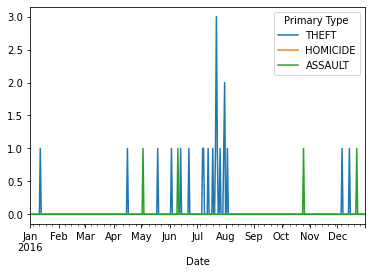

In [33]:
crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']]['2016'].resample('D').sum().plot()

## Create an interactive widget

Just a taste – see [the docs](https://ipywidgets.readthedocs.io/en/latest/index.html) for more options.

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(crime_type = crimes_by_type.columns)
def plot_chart(crime_type='THEFT'):
    crimes_by_type.loc[:, crime_type]['2016'].resample('D').sum().plot(title=crime_type)